# Unsupervised Learning

In [48]:
import numpy as np
import pandas as pd

# For visulization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.figure_factory as ff

df =  pd.read_csv("df_data_test.csv")

## VaderSentiment

#### VADER is one of the most popular methods for Unsupervised Learning Sentiment Analysis. It not only evaluates Polarity but also Intensity of emotions.

##### Since we will use both supervised and unsupervised learning for the sentiment analysis, all the reviews already have a sentiment tag. For the unsupervised learning, we will not use this tag during the learning process.

In [49]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [50]:
analyser = SentimentIntensityAnalyzer()
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [51]:
# read the target columns from the original csv file
col_list = ["name","text_clean"]
df =  pd.read_csv("df_data_test.csv", usecols=col_list)
df.head()

,name,text_clean
0,Fusionx,sigh and wonder how the decimal on my concurre...
1,Aaron Schneider,: well guess i should let y'all know i've been...
2,Dr. Ewa J. Antczak,segabits mcdonald's now with the depression meal
3,"Andrew, Cymro, 🏴󠁧󠁢󠁷󠁬󠁳󠁿🇪🇺🇺🇦🇵🇸, #NHS💙",amercanbarbie there is a huge difference betwe...
4,Bubbles,depression tucks me in at pm sharp every night


In [52]:
# add 4 additional columns to the targeted columns to show negetive intensity, neatral intensity, positive intensity and compound one
df=df.reindex(columns = df.columns.tolist()  + ['negative','neutral','positive','compound']) 
df.head()

,name,text_clean,negative,neutral,positive,compound
0,Fusionx,sigh and wonder how the decimal on my concurre...,NaN,NaN,NaN,NaN
1,Aaron Schneider,: well guess i should let y'all know i've been...,NaN,NaN,NaN,NaN
2,Dr. Ewa J. Antczak,segabits mcdonald's now with the depression meal,NaN,NaN,NaN,NaN
3,"Andrew, Cymro, 🏴󠁧󠁢󠁷󠁬󠁳󠁿🇪🇺🇺🇦🇵🇸, #NHS💙",amercanbarbie there is a huge difference betwe...,NaN,NaN,NaN,NaN
4,Bubbles,depression tucks me in at pm sharp every night,NaN,NaN,NaN,NaN


In [53]:
scores = []
post_id = []

In [54]:
# loop for each row in dataframe and evaluate the scores to store them in relevant columns.
for a in range(0,df.shape[0]):
    score = analyser.polarity_scores(df['text_clean'][a])
    scores.append(score)
    df['negative'][a]=score['neg']
    df['neutral'][a]=score['neu']
    df['positive'][a]=score['pos']
    df['compound'][a]=score['compound']

In [55]:
op1=pd.DataFrame(scores)
op2=pd.DataFrame(post_id) 

In [56]:
op1.head()

,neg,neu,pos,compound
0,0.139,0.771,0.090,-0.4939
1,0.177,0.648,0.175,0.2278
2,0.381,0.619,0.000,-0.5719
3,0.080,0.827,0.093,-0.0972
4,0.316,0.684,0.000,-0.5719


In [57]:
df.head()

,name,text_clean,negative,neutral,positive,compound
0,Fusionx,sigh and wonder how the decimal on my concurre...,0.139,0.771,0.090,-0.4939
1,Aaron Schneider,: well guess i should let y'all know i've been...,0.177,0.648,0.175,0.2278
2,Dr. Ewa J. Antczak,segabits mcdonald's now with the depression meal,0.381,0.619,0.000,-0.5719
3,"Andrew, Cymro, 🏴󠁧󠁢󠁷󠁬󠁳󠁿🇪🇺🇺🇦🇵🇸, #NHS💙",amercanbarbie there is a huge difference betwe...,0.080,0.827,0.093,-0.0972
4,Bubbles,depression tucks me in at pm sharp every night,0.316,0.684,0.000,-0.5719


In [58]:
# add a column to store the results based on the compound score
df=df.reindex(columns = df.columns.tolist()  + ['vader_sentiment']) 
df.head()

,name,text_clean,negative,neutral,positive,compound,vader_sentiment
0,Fusionx,sigh and wonder how the decimal on my concurre...,0.139,0.771,0.090,-0.4939,NaN
1,Aaron Schneider,: well guess i should let y'all know i've been...,0.177,0.648,0.175,0.2278,NaN
2,Dr. Ewa J. Antczak,segabits mcdonald's now with the depression meal,0.381,0.619,0.000,-0.5719,NaN
3,"Andrew, Cymro, 🏴󠁧󠁢󠁷󠁬󠁳󠁿🇪🇺🇺🇦🇵🇸, #NHS💙",amercanbarbie there is a huge difference betwe...,0.080,0.827,0.093,-0.0972,NaN
4,Bubbles,depression tucks me in at pm sharp every night,0.316,0.684,0.000,-0.5719,NaN


In [59]:
for a in range(0,df.shape[0]):
    if(df['compound'][a]<-0.05):
        df['vader_sentiment'][a]='neg'
    else:
        df['vader_sentiment'][a]='pos'

In [60]:
df.head()

,name,text_clean,negative,neutral,positive,compound,vader_sentiment
0,Fusionx,sigh and wonder how the decimal on my concurre...,0.139,0.771,0.090,-0.4939,neg
1,Aaron Schneider,: well guess i should let y'all know i've been...,0.177,0.648,0.175,0.2278,pos
2,Dr. Ewa J. Antczak,segabits mcdonald's now with the depression meal,0.381,0.619,0.000,-0.5719,neg
3,"Andrew, Cymro, 🏴󠁧󠁢󠁷󠁬󠁳󠁿🇪🇺🇺🇦🇵🇸, #NHS💙",amercanbarbie there is a huge difference betwe...,0.080,0.827,0.093,-0.0972,neg
4,Bubbles,depression tucks me in at pm sharp every night,0.316,0.684,0.000,-0.5719,neg


In [61]:
# show a table of the number of post under each categories
var1 = df.groupby('vader_sentiment').count()['text_clean'].reset_index().sort_values(by='text_clean',ascending=False)
sns.set_style("white")
sns.set_palette("Set2")
var1.style.background_gradient()

,vader_sentiment,text_clean
0,neg,87
1,pos,13


<AxesSubplot:xlabel='vader_sentiment', ylabel='count'>

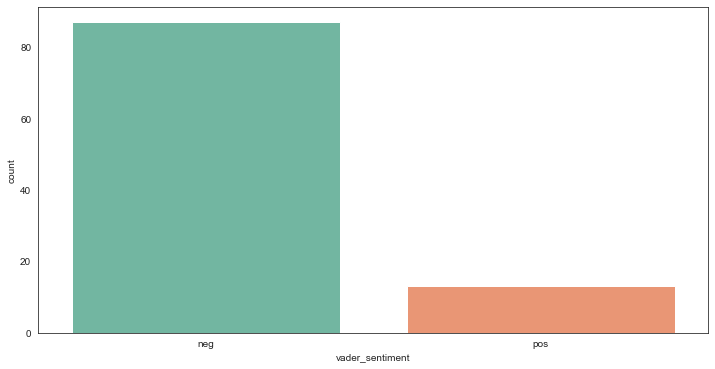

In [62]:
# show a histogram of each categories
plt.figure(figsize=(12,6))
sns.countplot(x='vader_sentiment',data=df)

## Sentiwordnet

#### Sentiwordnet will help to know the characterstics and the positions of the word being used to get the sentiment.
1. The posotions are:
   - n: NOUN
   - v: VERB
   - a: ADJECTIVE
   - s: ADJECTIVE SATELLITE
   - r: ADVERB

In [63]:
import numpy as np
import pandas as pd
import nltk
import ssl
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

# For visulization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.figure_factory as ff

In [64]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\94071\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\94071\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\94071\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\94071\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\94071\AppData\Roaming\nltk_data...
[nltk_data]    | 

True

In [67]:
data =  pd.read_csv("df_data_test.csv")
col_list = ["name","text","text_clean"]
data =  pd.read_csv("df_data_test.csv", usecols=col_list)

In [68]:
data=data.reindex(columns = data.columns.tolist()  + ['pos_tags','senti_score','overall_sentiment']) 
data.head()

,text,name,text_clean,pos_tags,senti_score,overall_sentiment
0,"Sigh and wonder how the decimal on my ""concurr...",Fusionx,sigh and wonder how the decimal on my concurre...,NaN,NaN,NaN
1,"🍔: Well, guess I should let y'all know I've be...",Aaron Schneider,: well guess i should let y'all know i've been...,NaN,NaN,NaN
2,@SEGAbits McDonald's now with the depression meal,Dr. Ewa J. Antczak,segabits mcdonald's now with the depression meal,NaN,NaN,NaN
3,@Amer1can_Barbie There is a huge difference be...,"Andrew, Cymro, 🏴󠁧󠁢󠁷󠁬󠁳󠁿🇪🇺🇺🇦🇵🇸, #NHS💙",amercanbarbie there is a huge difference betwe...,NaN,NaN,NaN
4,depression tucks me in at 7pm sharp every night,Bubbles,depression tucks me in at pm sharp every night,NaN,NaN,NaN


In [69]:
pos=neg=obj=count=0

postagging = []

for post in data['text']:
    list = word_tokenize(post)
    postagging.append(nltk.pos_tag(list))

data['pos_tags'] = postagging

def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None

In [70]:
def get_sentiment(word,tag):
    wn_tag = penn_to_wn(tag)
    
    if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
        return []

    synsets = wn.synsets(word, pos=wn_tag)
    if not synsets:
        return []

    synset = synsets[0]
    swn_synset = swn.senti_synset(synset.name())

    return [synset.name(), swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score()]

    pos=neg=obj=count=0

In [71]:
senti_score = []

for pos_val in data['pos_tags']:
    senti_val = [get_sentiment(x,y) for (x,y) in pos_val]
    for score in senti_val:
        try:
            pos = pos + score[1]  
            neg = neg + score[2]  
        except:
            continue
    senti_score.append(pos - neg)
    pos=neg=0   
data['senti_score'] = senti_score
data.head()

,text,name,text_clean,pos_tags,senti_score,overall_sentiment
0,"Sigh and wonder how the decimal on my ""concurr...",Fusionx,sigh and wonder how the decimal on my concurre...,"[(Sigh, NNP), (and, CC), (wonder, VB), (how, W...",-0.125,NaN
1,"🍔: Well, guess I should let y'all know I've be...",Aaron Schneider,: well guess i should let y'all know i've been...,"[(🍔, NN), (:, :), (Well, RB), (,, ,), (guess, ...",-0.250,NaN
2,@SEGAbits McDonald's now with the depression meal,Dr. Ewa J. Antczak,segabits mcdonald's now with the depression meal,"[(@, NN), (SEGAbits, NNP), (McDonald, NNP), ('...",-0.375,NaN
3,@Amer1can_Barbie There is a huge difference be...,"Andrew, Cymro, 🏴󠁧󠁢󠁷󠁬󠁳󠁿🇪🇺🇺🇦🇵🇸, #NHS💙",amercanbarbie there is a huge difference betwe...,"[(@, JJ), (Amer1can_Barbie, NNP), (There, EX),...",0.125,NaN
4,depression tucks me in at 7pm sharp every night,Bubbles,depression tucks me in at pm sharp every night,"[(depression, NN), (tucks, NNS), (me, PRP), (i...",-0.125,NaN


In [72]:
overall=[]
for i in range(len(data)):
    if data['senti_score'][i]>= 0.05:
        overall.append('pos')
    else:
        overall.append('neg')
data['overall_sentiment']=overall

In [73]:
data.head()

,text,name,text_clean,pos_tags,senti_score,overall_sentiment
0,"Sigh and wonder how the decimal on my ""concurr...",Fusionx,sigh and wonder how the decimal on my concurre...,"[(Sigh, NNP), (and, CC), (wonder, VB), (how, W...",-0.125,neg
1,"🍔: Well, guess I should let y'all know I've be...",Aaron Schneider,: well guess i should let y'all know i've been...,"[(🍔, NN), (:, :), (Well, RB), (,, ,), (guess, ...",-0.250,neg
2,@SEGAbits McDonald's now with the depression meal,Dr. Ewa J. Antczak,segabits mcdonald's now with the depression meal,"[(@, NN), (SEGAbits, NNP), (McDonald, NNP), ('...",-0.375,neg
3,@Amer1can_Barbie There is a huge difference be...,"Andrew, Cymro, 🏴󠁧󠁢󠁷󠁬󠁳󠁿🇪🇺🇺🇦🇵🇸, #NHS💙",amercanbarbie there is a huge difference betwe...,"[(@, JJ), (Amer1can_Barbie, NNP), (There, EX),...",0.125,pos
4,depression tucks me in at 7pm sharp every night,Bubbles,depression tucks me in at pm sharp every night,"[(depression, NN), (tucks, NNS), (me, PRP), (i...",-0.125,neg


In [74]:
var2 = data.groupby('overall_sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
sns.set_style("white")
sns.set_palette("Set2")
var2.style.background_gradient()

,overall_sentiment,text
0,neg,84
1,pos,16


<AxesSubplot:xlabel='overall_sentiment', ylabel='count'>

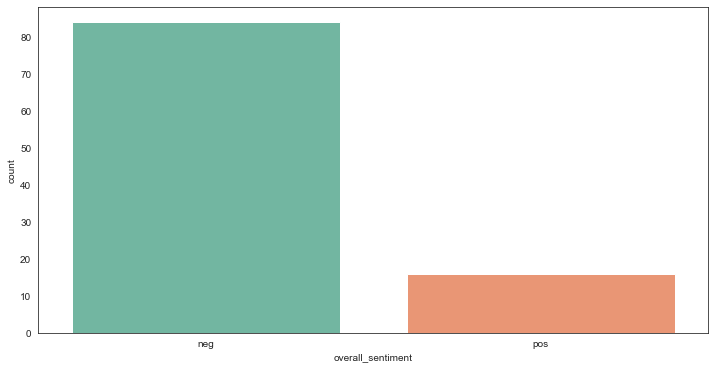

In [75]:
plt.figure(figsize=(12,6))
sns.countplot(x='overall_sentiment',data=data)

## Flair

#### Flair has a powerful NLP library, Flair allows the application of current optimal NLP models to text, such as word sense disambiguation and classification. It’s a pre-trained embedding-based model, and use vector representation for each word to find sentiment behind.

In [ ]:
from flair.models import TextClassifier
from flair.data import Sentence

sia = TextClassifier.load('en-sentiment')
def flair_prediction(x):
    sentence = Sentence(x)
    sia.predict(sentence)
    score = sentence.labels[0]
    if "POSITIVE" in str(score):
        return "pos"
    elif "NEGATIVE" in str(score):
        return "neg"
    else:
        return "neu"
df["sentiment"] = df["text_clean"].apply(flair_prediction)

### Conclusion


In [508]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'Unsupervised Learning Model':['VADER', 'Sentiwordnet'],
                   'Accuracy':['0.716728318947801','0.64878750513769'],
                  })
df

,Unsupervised Learning Model,Accuracy
0,VADER,0.716728318947801
1,Sentiwordnet,0.64878750513769
